# K Nearest Neighbours Classifier

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
def find_distance(a, b, p=2):
    dim = len(a)
    distance = 0
    for d in range(dim):
        distance += abs(a[d] - b[d]) ** p
        
    distance = distance**(1/p)
    return distance

In [5]:
def test_distance(test_point, train_points, y_train, k, p=1):
    distances = []
    for i in range(len(train_points)):
        distances.append(find_distance(test_point, train_points[i], p))
        
    df_distance = pd.DataFrame(data=distances, index=y_train.index ,columns=["dist"])
    df_nn = df_distance.sort_values(by=["dist"], axis=0)[:k]
    return df_nn

In [6]:
def return_most_common(y, df_nn):
    counter = Counter(y[df_nn.index])
    return counter.most_common()[0][0] 

In [7]:
def knn_predict(X_train, y_train, X_test, k=5, p=1):
    y_predicted_data = []
    for test_point in X_test:
        distances = test_distance(test_point, X_train, y_train, k, p)
        prediction = return_most_common(y_train, distances)
        y_predicted_data.append(prediction)
        
    return y_predicted_data

### For Glass Dataset

In [8]:
glass_data = pd.read_csv("glass.csv")
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [9]:
glass_data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Predicted Classes: 
[2, 3, 1, 2, 7, 5, 7, 5, 1, 2, 5, 1, 2, 2, 1, 2, 2, 5, 2, 7, 1, 2, 7, 1, 7, 2, 1, 1, 2, 2, 3, 7, 1, 7, 2, 7, 6, 2, 2, 1, 1, 2, 1, 6, 5, 1, 1, 1, 2, 7, 1, 2, 7, 1, 1, 1, 3, 7, 1, 2, 3, 1, 1, 2, 3]
True Classes: 
[2 2 1 1 7 5 7 2 1 1 2 1 2 1 2 5 2 5 1 7 1 1 7 1 7 2 1 1 2 2 3 5 2 7 2 7 6
 1 2 1 1 2 2 6 5 2 1 3 1 5 3 2 7 1 1 1 1 5 1 2 1 1 1 2 3]
Accuracy score is:  0.6615384615384615
Confusion Matrix: 
[[16  7  2  0  0  0]
 [ 4 12  1  2  0  0]
 [ 2  0  2  0  0  0]
 [ 0  1  0  3  0  3]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  8]]


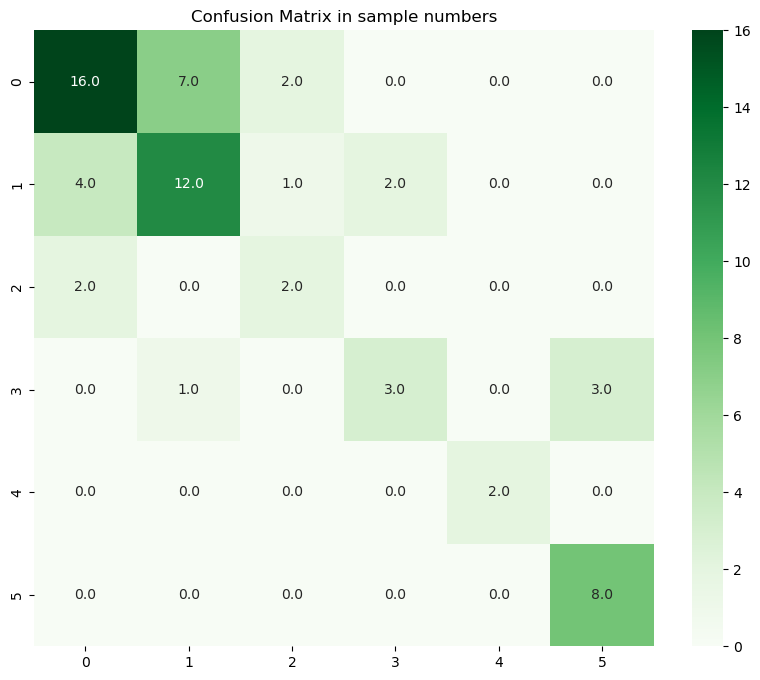

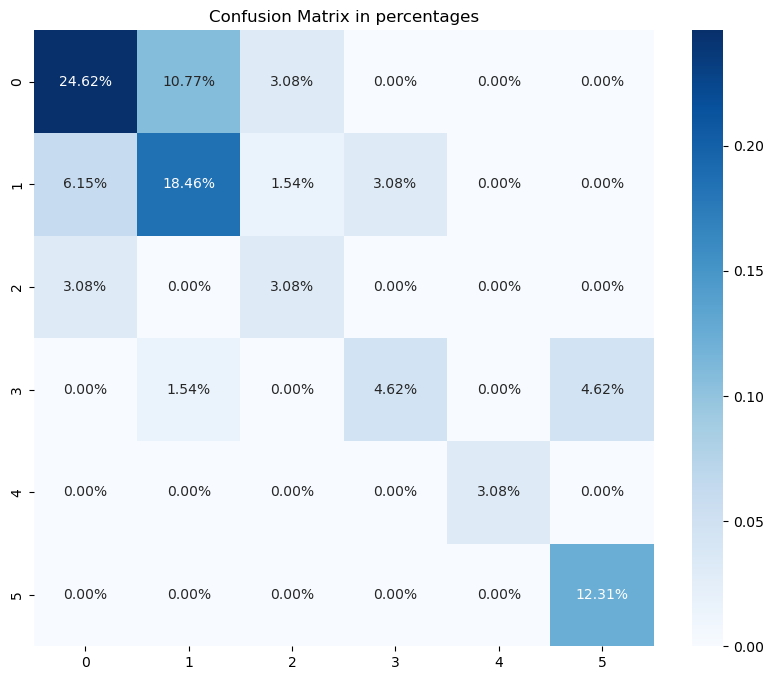

In [11]:
X, y = glass_data.drop("Type", axis=1), glass_data["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=125)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_preds = knn_predict(X_train, y_train, X_test, k=3, p=2)
print("Predicted Classes: ")
print(y_preds)
print("="*60)
print("True Classes: ")
print(y_test.values)
print("="*60)
print("Accuracy score is: ", accuracy_score(y_test, y_preds))
cf_matrix = confusion_matrix(y_test, y_preds)
print("Confusion Matrix: ")
print(cf_matrix)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cf_matrix, annot=True, fmt=".1f", ax=ax, cmap="Greens")
ax.set_title("Confusion Matrix in sample numbers")
plt.show()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues', ax=ax)
ax.set_title("Confusion Matrix in percentages")
plt.show()

### For Fruit dataset

In [13]:
fruit_data = pd.read_csv("fruit data.csv")
fruit_data.drop("fruit_subtype", axis=1, inplace=True)
fruit_data = fruit_data.drop("fruit_name", axis=1)
fruit_data

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79
5,2,80,5.8,4.3,0.77
6,2,80,5.9,4.3,0.81
7,2,76,5.8,4.0,0.81
8,1,178,7.1,7.8,0.92
9,1,172,7.4,7.0,0.89


Predicted Classes: 
[3, 4, 1, 2, 4, 3, 3, 1, 1, 4, 1, 1]
True Classes: 
[3 4 1 2 4 1 1 1 1 4 1 1]
Accuracy score is:  0.8333333333333334
Confusion Matrix: 
[[5 0 2 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 3]]


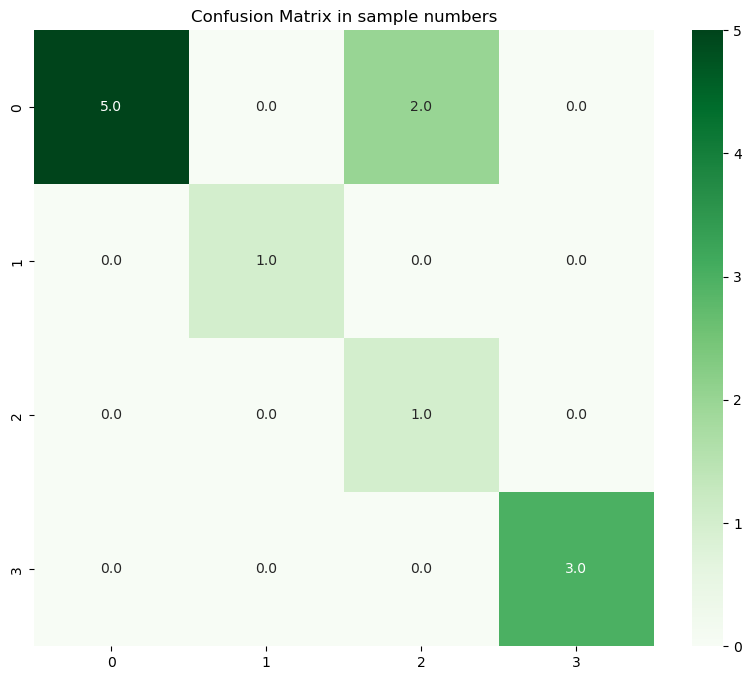

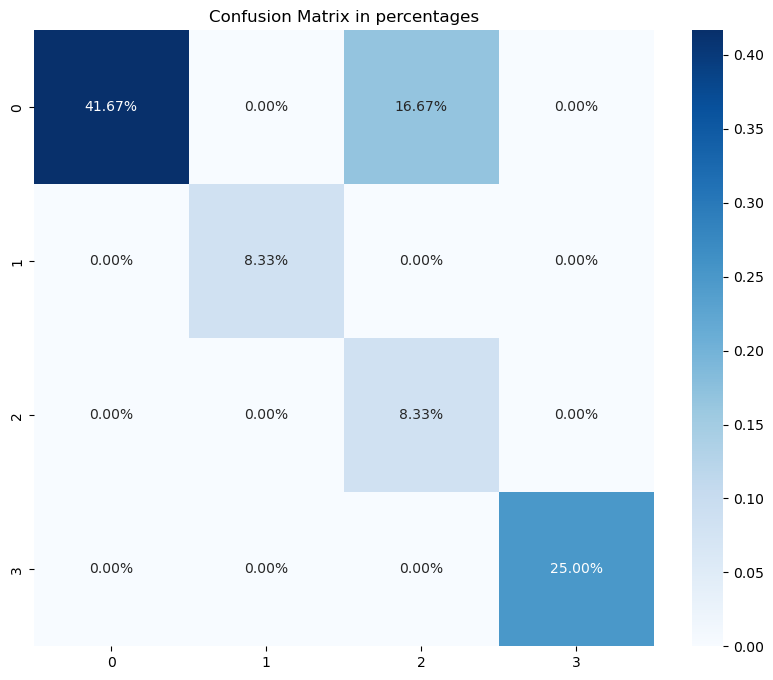

In [15]:
X, y = fruit_data.drop("fruit_label", axis=1), fruit_data["fruit_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=125)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_preds = knn_predict(X_train, y_train, X_test, k=5, p=1)
print("Predicted Classes: ")
print(y_preds)
print("="*60)
print("True Classes: ")
print(y_test.values)
print("="*60)
print("Accuracy score is: ", accuracy_score(y_test, y_preds))
cf_matrix = confusion_matrix(y_test, y_preds)
print("Confusion Matrix: ")
print(cf_matrix)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cf_matrix, annot=True, fmt=".1f", ax=ax, cmap="Greens")
ax.set_title("Confusion Matrix in sample numbers")
plt.show()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues', ax=ax)
ax.set_title("Confusion Matrix in percentages")
plt.show()